# AIMS AND OBJECTIVES OF THIS SOFTWARE

1. Producing the Analysis of this forex exchange rate dataset, covering the historical aspects over the period of time, 
    in short doing Timeseries Analysis
    
2. Data Cleansing and Transformation of Forex Exchange Dataset in order to transform it in format or structure required during 
    Timeseries Analysis and Machine Learning
  
3. Visualization of Forex Exchange Dataset based on Timeseries Analysis done on it.

4. Applying ARIMA MODEL, a Machine Learning algorithm, used to perform forecasting or predicting future value 

# IMPORTING REQUIRED PYTHON LIBRARIES & LOADING DATASET

We need all below libraries, that we're importing, in our Anaconda distribution in order for this notebook work correctly and show us desired results.

In [1]:
# Used for Data Analysis
import pandas as pd
# Used For Visualization
import matplotlib as mpl 
from matplotlib import pyplot as plt
import numpy as np
# Used for profiling and generating report in notebook or html
from pandas_profiling import ProfileReport 

# Python Machine Learning Modules and Packages

# Used to implement ARIMA Model
from statsmodels.tsa.arima_model import ARIMA 
# Used to calculate mean_squared_error which determine accuracy of any module, e.g. here ARIMA Model
from sklearn.metrics import mean_squared_error 

# below line is to show graphs or plots within notebook instead of separate window
%matplotlib inline 

# change the style of plot
plt.style.use('fivethirtyeight') 
#plt.style.use('seaborn')

In [2]:
# Data got from Kaggle platform

df = pd.read_csv('forex_exchange_files/Foreign_Exchange_Rates.csv', parse_dates=[1], index_col=1)

# Below, head function of dataframe return the view of all columns with given number of rows in dataframe, e.g. 5
df.head(5)

Unnamed: 0 AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
Time Series                                                 
2000-01-03            0                            1.5172   
2000-01-04            1                            1.5239   
2000-01-05            2                            1.5267   
2000-01-06            3                            1.5291   
2000-01-07            4                            1.5272   

            EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
Time Series                                                            
2000-01-03                0.9847                              1.9033   
2000-01-04                  0.97                              1.9238   
2000-01-05                0.9676                              1.9339   
2000-01-06                0.9686                              1.9436   
2000-01-07                0.9714                               1.938   

            UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
Time Series                                                               
2000-01-03                                     0.6146             1.805   
2000-01-04                                     0.6109            1.8405   
2000-01-05                                     0.6092             1.856   
2000-01-06                                      0.607              1.84   
2000-01-07                                     0.6104             1.831   

            CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
Time Series                                                 
2000-01-03                        1.4465           8.2798   
2000-01-04                        1.4518           8.2799   
2000-01-05                        1.4518           8.2798   
2000-01-06                        1.4571           8.2797   
2000-01-07                        1.4505           8.2794   

            HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
Time Series                                                            ...   
2000-01-03                            7.7765                    43.55  ...   
2000-01-04                            7.7775                    43.55  ...   
2000-01-05                             7.778                    43.55  ...   
2000-01-06                            7.7785                    43.55  ...   
2000-01-07                            7.7783                    43.55  ...   

            SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$  \
Time Series                                                               
2000-01-03                            1.6563                      7.329   
2000-01-04                            1.6535                      7.218   
2000-01-05                             1.656                      7.208   
2000-01-06                            1.6655                     7.2125   
2000-01-07                            1.6625                     7.2285   

            JAPAN - YEN/US$ MALAYSIA - RINGGIT/US$  \
Time Series                                          
2000-01-03            101.7                    3.8   
2000-01-04           103.09                    3.8   
2000-01-05           103.77                    3.8   
2000-01-06           105.19                    3.8   
2000-01-07           105.17                    3.8   

            NORWAY - NORWEGIAN KRONE/US$ SWEDEN - KRONA/US$  \
Time Series                                                   
2000-01-03                         7.964              8.443   
2000-01-04                         7.934               8.36   
2000-01-05                         7.935              8.353   
2000-01-06                          7.94             8.3675   
2000-01-07                         7.966              8.415   

            SRI LANKA - SRI LANKAN RUPEE/US$ SWITZERLAND - FRANC/US$  \
Time Series                                                            
2000-01-03                              72.3                  1.5808   
2000-01-04      

# Data Wrangling and Cleaning

In [3]:
# Below line removes extra index column that comes while importing the dataset from excel or '.csv' file
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)

In [4]:
df = df.replace('ND', np.NAN)

In [5]:
# Below line will drop or remove any row in dataset which contains 'NAN' value
df.dropna(how='any', inplace=True)

In [6]:
df = df.apply(pd.to_numeric, errors='ignore')
df.head()

AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
Time Series                                                            
2000-01-03                              1.5172                0.9847   
2000-01-04                              1.5239                0.9700   
2000-01-05                              1.5267                0.9676   
2000-01-06                              1.5291                0.9686   
2000-01-07                              1.5272                0.9714   

             NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
Time Series                                        
2000-01-03                                1.9033   
2000-01-04                                1.9238   
2000-01-05                                1.9339   
2000-01-06                                1.9436   
2000-01-07                                1.9380   

             UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
Time Series                                                                 
2000-01-03                                      0.6146             1.8050   
2000-01-04                                      0.6109             1.8405   
2000-01-05                                      0.6092             1.8560   
2000-01-06                                      0.6070             1.8400   
2000-01-07                                      0.6104             1.8310   

             CANADA - CANADIAN DOLLAR/US$  CHINA - YUAN/US$  \
Time Series                                                   
2000-01-03                         1.4465            8.2798   
2000-01-04                         1.4518            8.2799   
2000-01-05                         1.4518            8.2798   
2000-01-06                         1.4571            8.2797   
2000-01-07                         1.4505            8.2794   

             HONG KONG - HONG KONG DOLLAR/US$  INDIA - INDIAN RUPEE/US$  \
Time Series                                                               
2000-01-03                             7.7765                     43.55   
2000-01-04                             7.7775                     43.55   
2000-01-05                             7.7780                     43.55   
2000-01-06                             7.7785                     43.55   
2000-01-07                             7.7783                     43.55   

             KOREA - WON/US$  ...  SINGAPORE - SINGAPORE DOLLAR/US$  \
Time Series                   ...                                     
2000-01-03            1128.0  ...                            1.6563   
2000-01-04            1122.5  ...                            1.6535   
2000-01-05            1135.0  ...                            1.6560   
2000-01-06            1146.5  ...                            1.6655   
2000-01-07            1138.0  ...                            1.6625   

             DENMARK - DANISH KRONE/US$  JAPAN - YEN/US$  \
Time Series                                                
2000-01-03                       7.3290           101.70   
2000-01-04                       7.2180           103.09   
2000-01-05                       7.2080           103.77   
2000-01-06                       7.2125           105.19   
2000-01-07                       7.2285           105.17   

             MALAYSIA - RINGGIT/US$  NORWAY - NORWEGIAN KRONE/US$  \
Time Series                                                         
2000-01-03                      3.8                         7.964   
2000-01-04                      3.8                         7.934   
2000-01-05                      3.8                         7.935   
2000-01-06                      3.8                         7.940   
2000-01-07                      3.8                         7.966   

             SWEDEN - KRONA/US$  SRI LANKA - SRI LANKAN RUPEE/US$  \
Time Series                                                         
2000-01-03               8.4430                             72.30   
2000-01-04               

In [7]:
# Below line will show info about each column, its type and no. of rows it contains
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5015 entries, 2000-01-03 to 2019-12-31
Data columns (total 22 columns):
AUSTRALIA - AUSTRALIAN DOLLAR/US$            5015 non-null float64
EURO AREA - EURO/US$                         5015 non-null float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          5015 non-null float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    5015 non-null float64
BRAZIL - REAL/US$                            5015 non-null float64
CANADA - CANADIAN DOLLAR/US$                 5015 non-null float64
CHINA - YUAN/US$                             5015 non-null float64
HONG KONG - HONG KONG DOLLAR/US$             5015 non-null float64
INDIA - INDIAN RUPEE/US$                     5015 non-null float64
KOREA - WON/US$                              5015 non-null float64
MEXICO - MEXICAN PESO/US$                    5015 non-null float64
SOUTH AFRICA - RAND/US$                      5015 non-null float64
SINGAPORE - SINGAPORE DOLLAR/US$             5015 non-null float64
DENM

# Forex Exchange Rates Data Profiling

This profile report is being created with cleaned dataset without missing values not with original dataset.

In [8]:
profile = ProfileReport(df, title='Forex Exchange Rates Data', html={'style':{'full_width':True}})

In [9]:
profile.to_notebook_iframe()

## Generating Report

Saves the report in html file named 'forex_exchange_rates_report.html' within 'forex_exchange_files' directory.

In [10]:
profile.to_file(output_file="forex_exchange_files/forex_exchange_rates_report.html")

In [11]:
df.describe()

AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
count                        5015.000000           5015.000000   
mean                            1.332160              0.844014   
std                             0.269974              0.126826   
min                             0.906900              0.624600   
25%                             1.115200              0.751000   
50%                             1.311300              0.815600   
75%                             1.430400              0.900150   
max                             2.071300              1.209200   

       NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
count                          5015.000000   
mean                              1.543820   
std                               0.337414   
min                               1.134600   
25%                               1.323800   
50%                               1.442600   
75%                               1.591200   
max                               2.551000   

       UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
count                                5015.000000        5015.000000   
mean                                    0.640466           2.548483   
std                                     0.082562           0.724234   
min                                     0.473800           1.537500   
25%                                     0.587500           1.945650   
50%                                     0.636500           2.329100   
75%                                     0.692400           3.130000   
max                                     0.828700           4.259400   

       CANADA - CANADIAN DOLLAR/US$  CHINA - YUAN/US$  \
count                   5015.000000       5015.000000   
mean                       1.230503          7.200544   
std                        0.182136          0.820413   
min                        0.916800          6.040200   
25%                        1.055850          6.475550   
50%                        1.237100          6.860000   
75%                        1.335700          8.276500   
max                        1.612800          8.280000   

       HONG KONG - HONG KONG DOLLAR/US$  INDIA - INDIAN RUPEE/US$  \
count                       5015.000000               5015.000000   
mean                           7.782643                 52.726249   
std                            0.027551                  9.678708   
min                            7.708500                 38.480000   
25%                            7.756400                 45.250000   
50%                            7.780600                 48.100000   
75%                            7.799800                 62.440000   
max                            7.849900                 74.330000   

       KOREA - WON/US$  ...  SINGAPORE - SINGAPORE DOLLAR/US$  \
count      5015.000000  ...                       5015.000000   
mean       1125.552552  ...                          1.480412   
std         103.406953  ...                          0.189003   
min         903.200000  ...                          1.200700   
25%        1067.570000  ...                          1.342900   
50%        1127.790000  ...                          1.408400   
75%        1180.000000  ...                          1.679350   
max        1570.100000  ...                          1.854000   

       DENMARK - DANISH KRONE/US$  JAPAN - YEN/US$  MALAYSIA - RINGGIT/US$  \
count                 5015.000000      5015.000000             5015.000000   
mean                     6.286814       106.589230                3.651129   
std                      0.943430        13.211723                0.378635   
min                      4.660500        75.720000                2.937000   
25%                      5.593550       100.080000                3.290500   
50%                      6.072500       109.020000                3.800000   
75%                      6.714850       116.815000                3.800000   
max        

# VISUALIZATION OF TIMESERIES ANALYSIS OF GIVEN FOREX EXCHANGE DATASET

## Visualization of Each Currency Against USD Over the Years

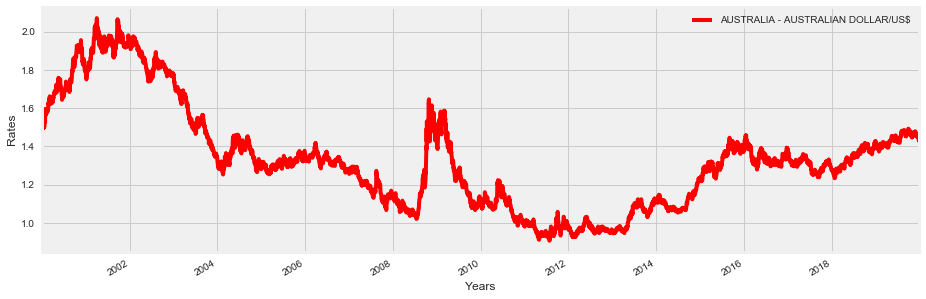

In [12]:
# list of colors which is cycled through no. of plots in this section
color=['red','green','blue', 'magenta'] 

# Plotting first column with plot width and height of 14 and 5 and color selected from the list 'color'
df.iloc[:, 0:1].plot(figsize=(14, 5), color=color[0])

# label of x-axis
plt.xlabel('Years') 
# label of y-axis
plt.ylabel('Rates') 

plt.show()

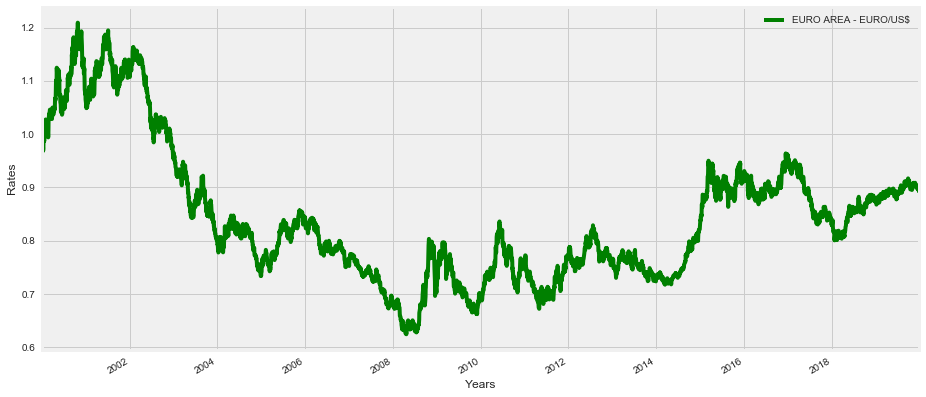

In [13]:
# plot the timeseries data with line plot
df.iloc[:, 1:2].plot(figsize=(14, 7), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

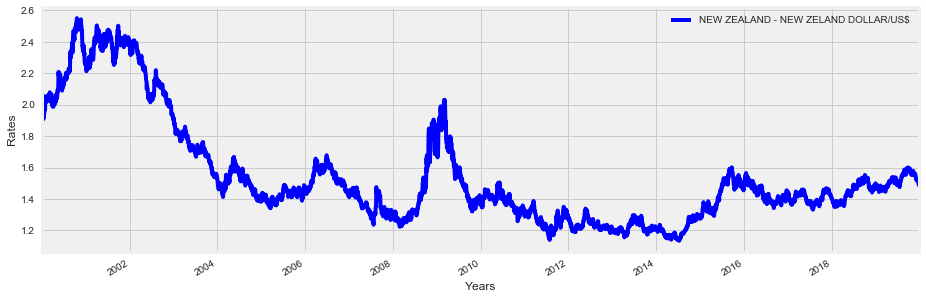

In [14]:
# plot the timeseries data with line plot
df.iloc[:, 2:3].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

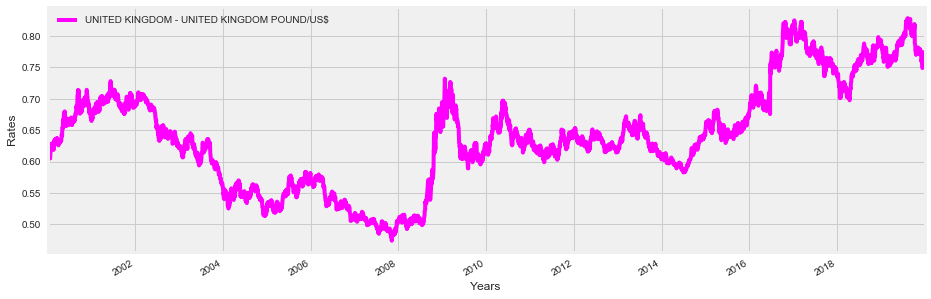

In [15]:
# plot the timeseries data with line plot
df.iloc[:, 3:4].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

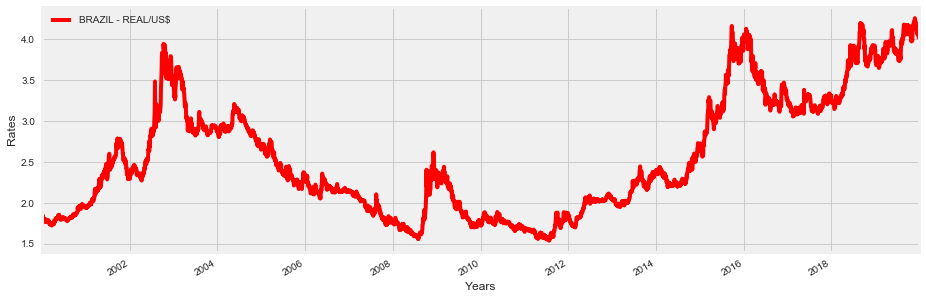

In [16]:
# plot the timeseries data with line plot
df.iloc[:, 4:5].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

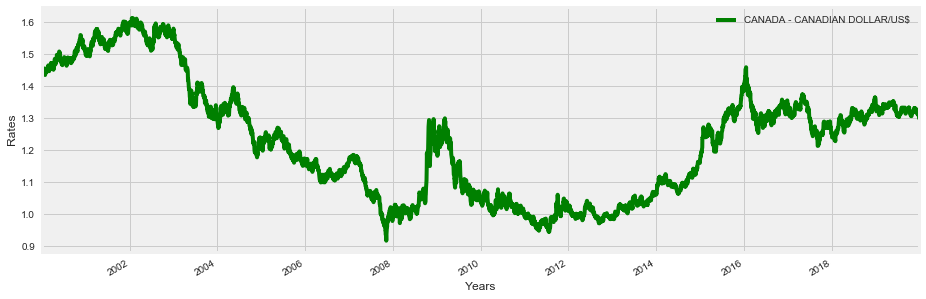

In [17]:
# plot the timeseries data with line plot
df.iloc[:, 5:6].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

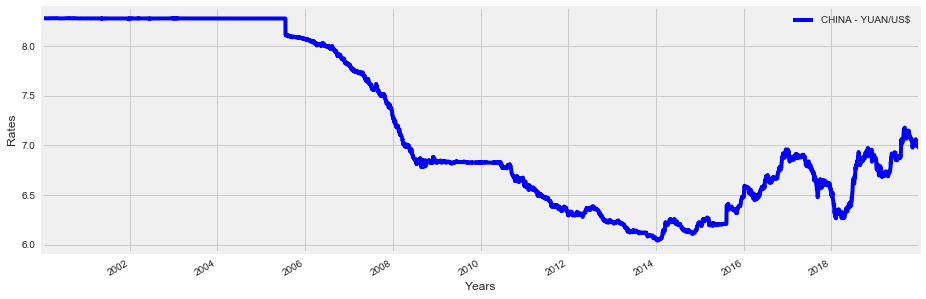

In [18]:
# plot the timeseries data with line plot
df.iloc[:, 6:7].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

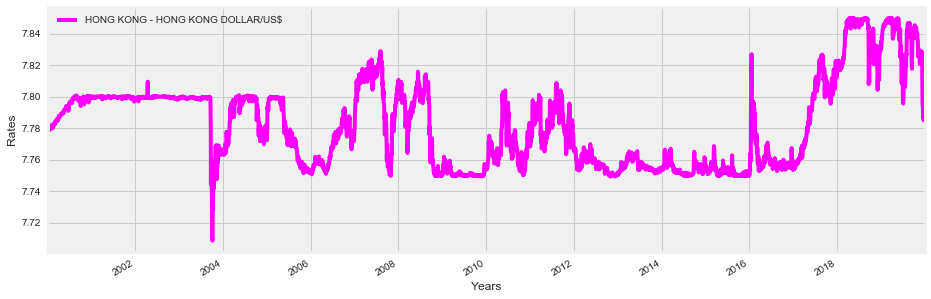

In [19]:
# plot the timeseries data with line plot
df.iloc[:, 7:8].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

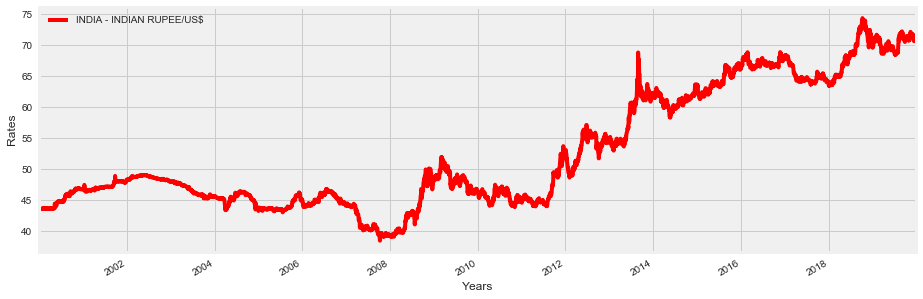

In [20]:
# plot the timeseries data with line plot
df.iloc[:, 8:9].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

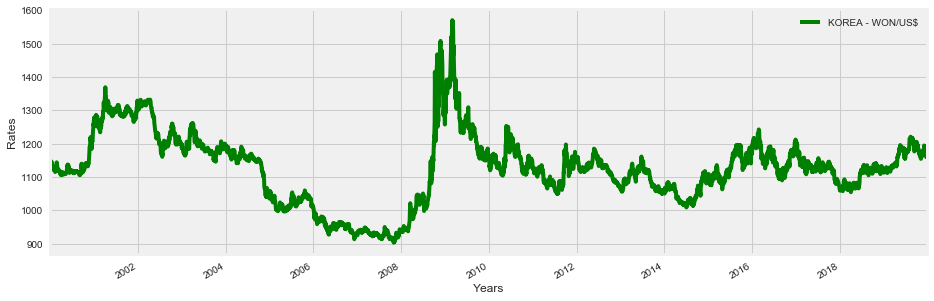

In [21]:
# plot the timeseries data with line plot
df.iloc[:, 9:10].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

Text(0, 0.5, 'Rates')

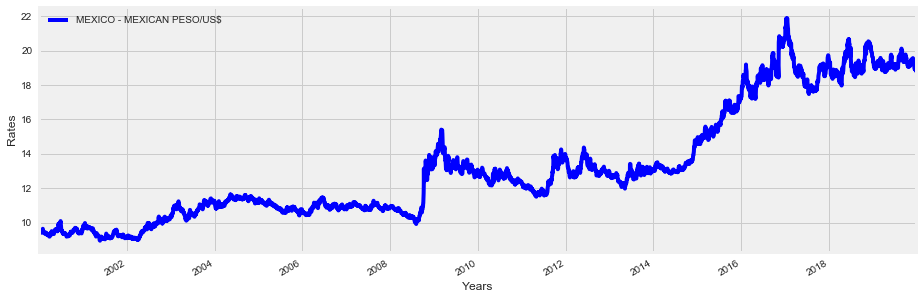

In [22]:
# plot the timeseries data with line plot
plot = df.iloc[:, 10:11].plot(figsize=(14, 5), color=color[2])
plot.set_xlabel('Years')
plot.set_ylabel('Rates')

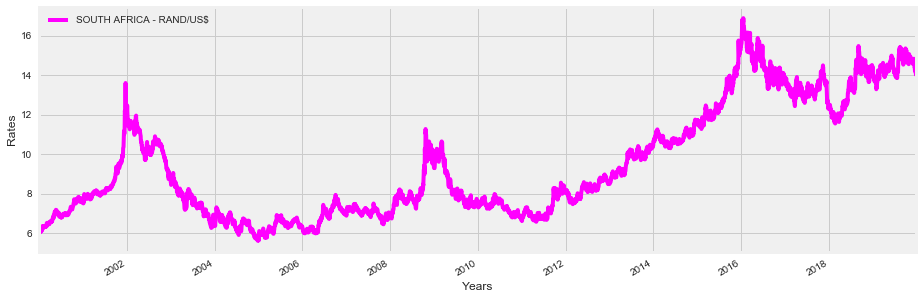

In [23]:
# plot the timeseries data with line plot
df.iloc[:, 11:12].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

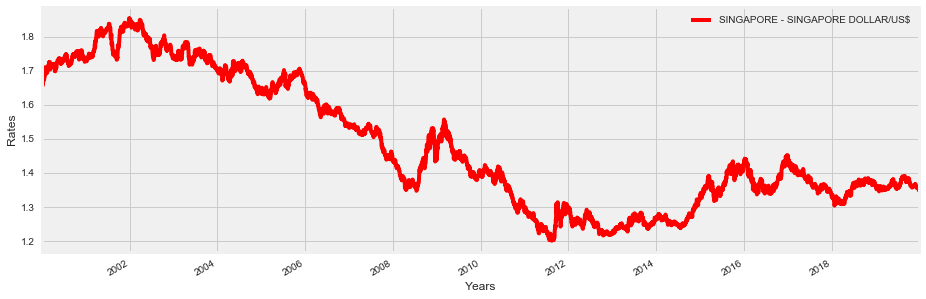

In [24]:
# plot the timeseries data with line plot
df.iloc[:, 12:13].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

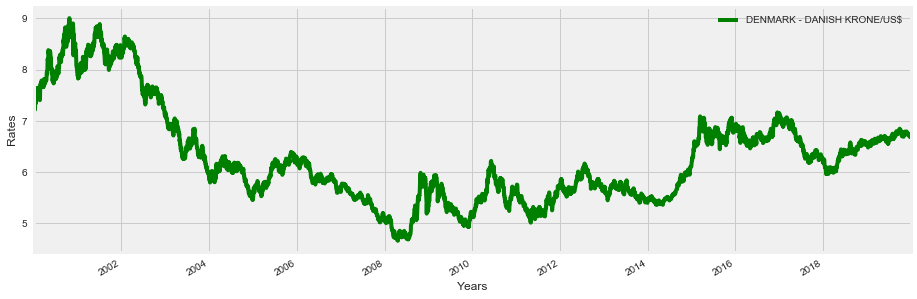

In [25]:
# plot the timeseries data with line plot
df.iloc[:, 13:14].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

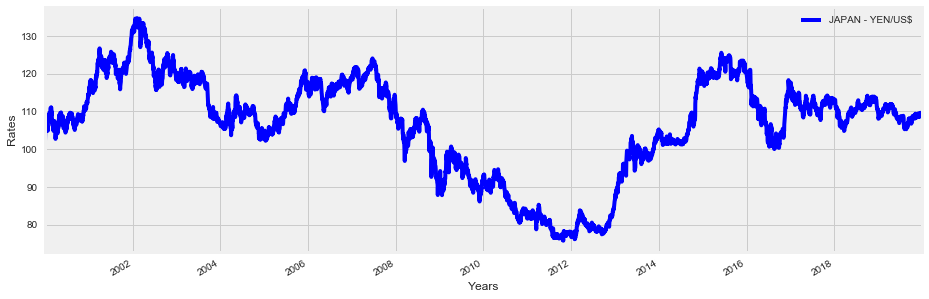

In [26]:
# plot the timeseries data with line plot
df.iloc[:, 14:15].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

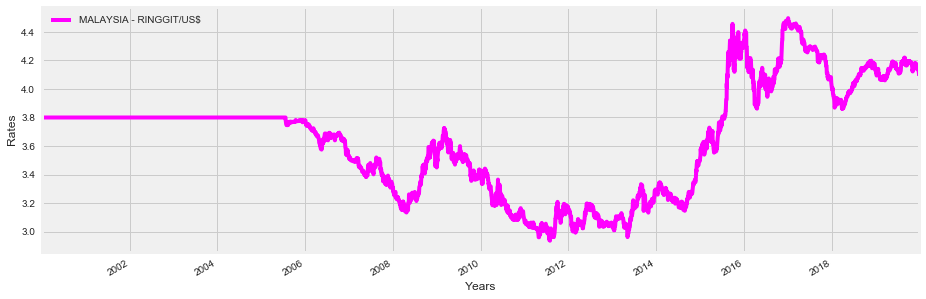

In [27]:
# plot the timeseries data with line plot
df.iloc[:, 15:16].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

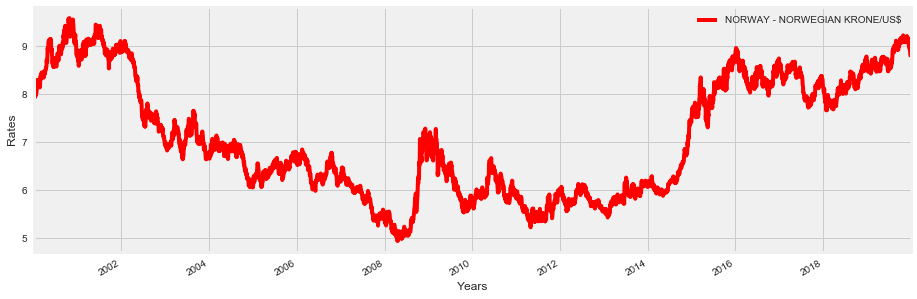

In [28]:
# plot the timeseries data with line plot
df.iloc[:, 16:17].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

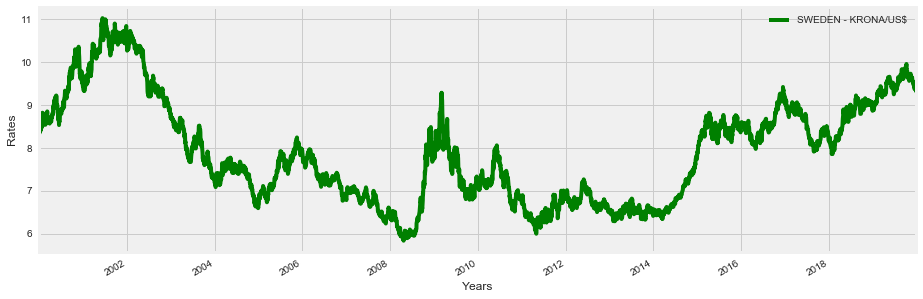

In [29]:
# plot the timeseries data with line plot
df.iloc[:, 17:18].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

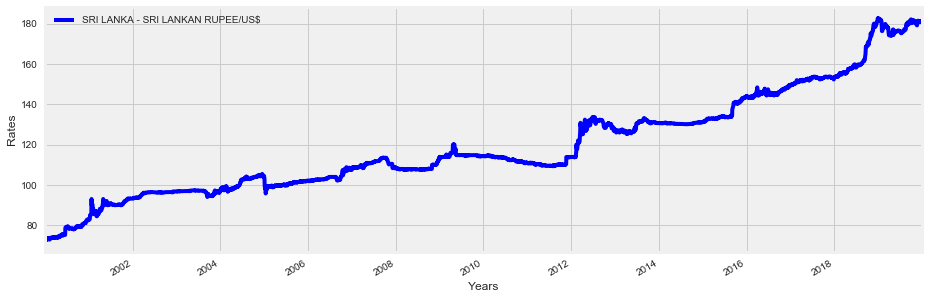

In [30]:
# plot the timeseries data with line plot
df.iloc[:, 18:19].plot(figsize=(14, 5), color=color[2])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

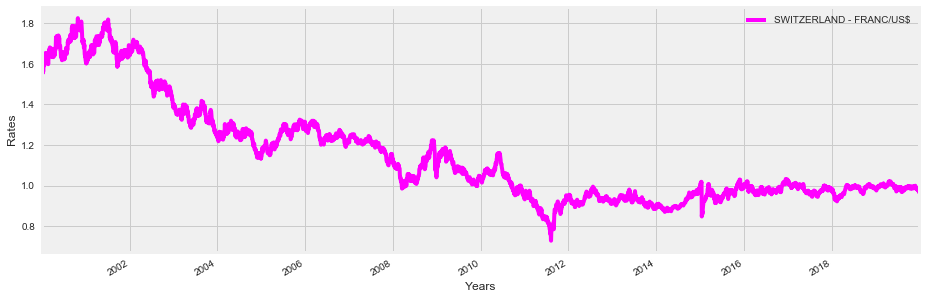

In [31]:
# plot the timeseries data with line plot
df.iloc[:, 19:20].plot(figsize=(14, 5), color=color[3])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

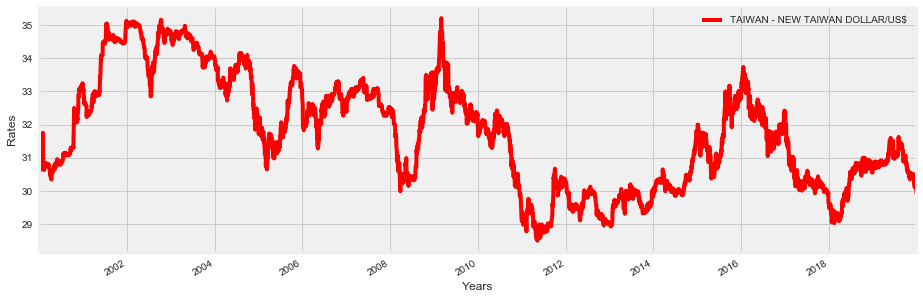

In [32]:
# plot the timeseries data with line plot
df.iloc[:, 20:21].plot(figsize=(14, 5), color=color[0])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

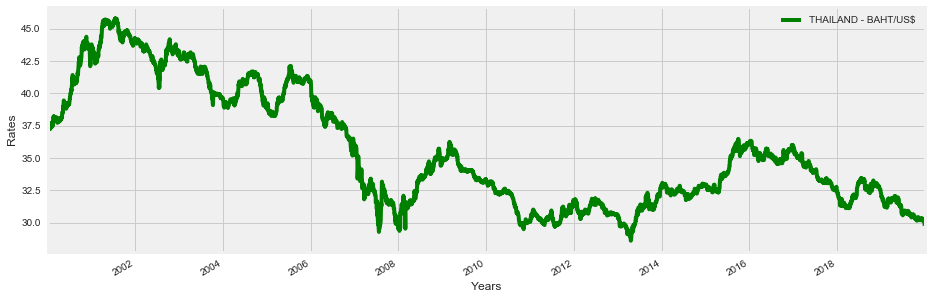

In [33]:
# plot the timeseries data with line plot
df.iloc[:, 21:22].plot(figsize=(14, 5), color=color[1])
plt.xlabel('Years')
plt.ylabel('Rates')
plt.show()

## Visualization of Timeseries Analysis of Single Year

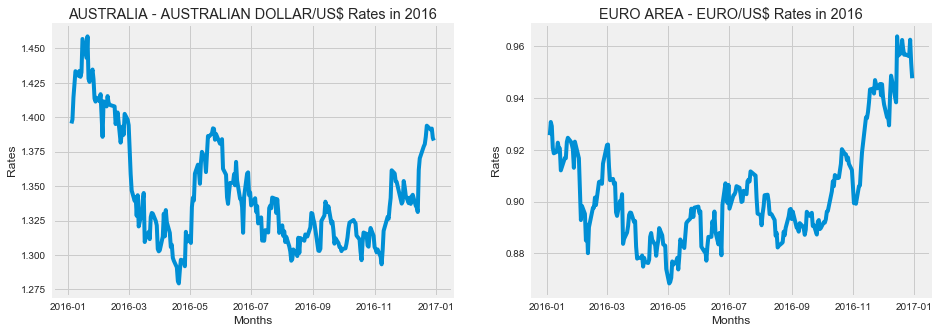

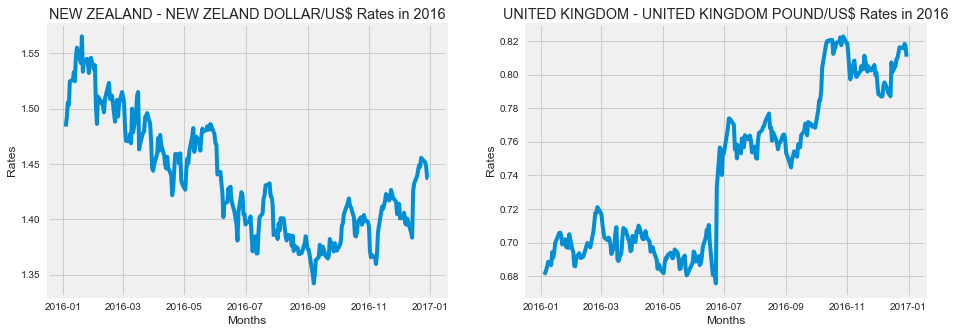

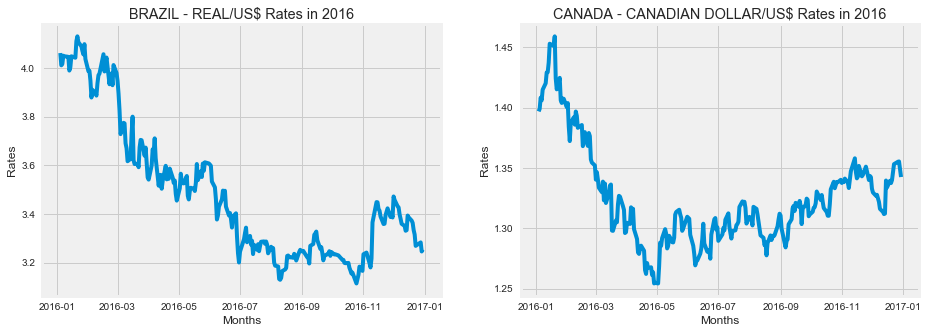

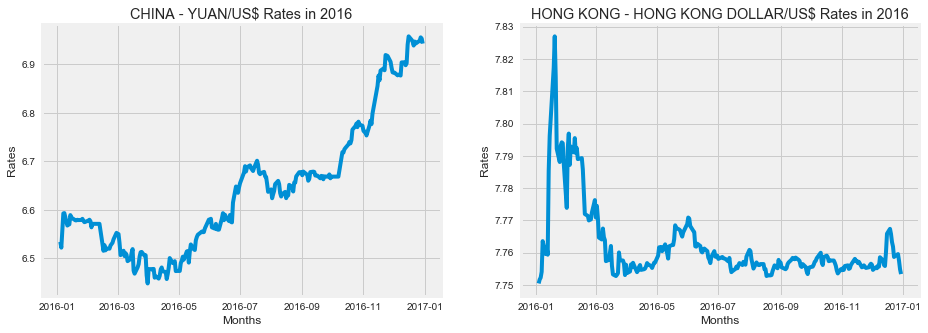

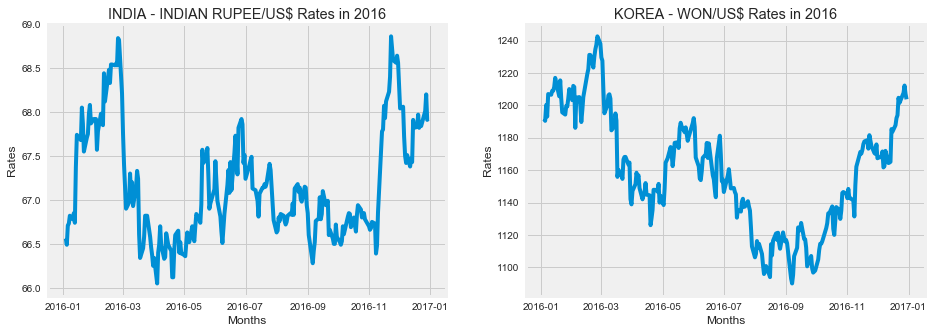

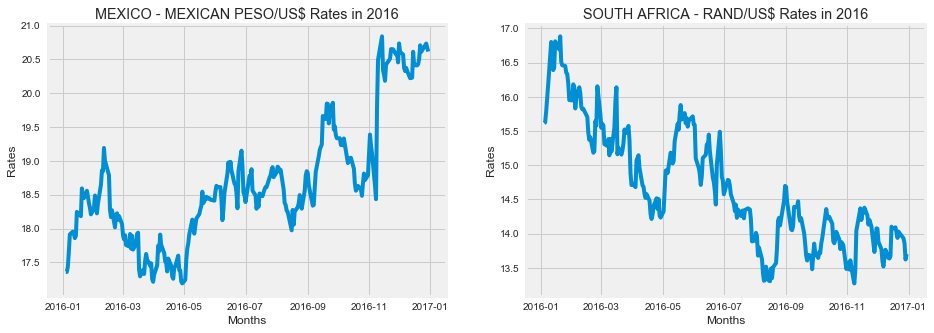

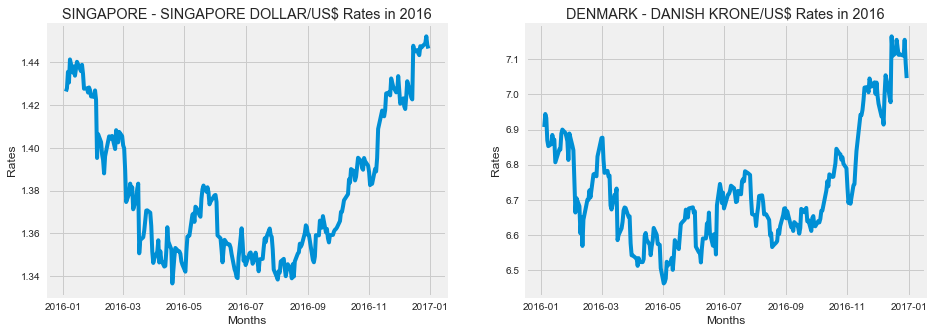

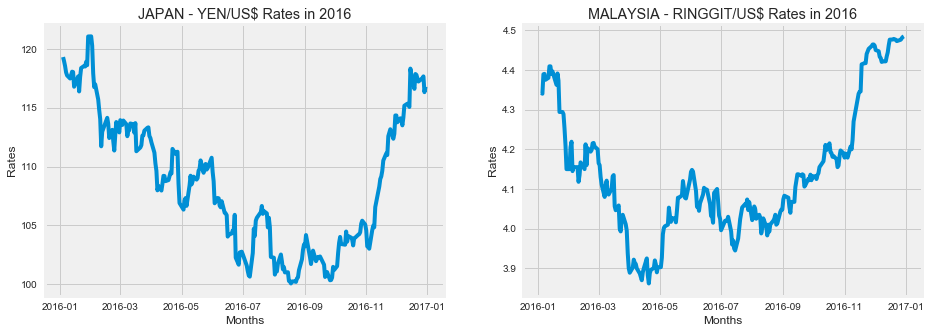

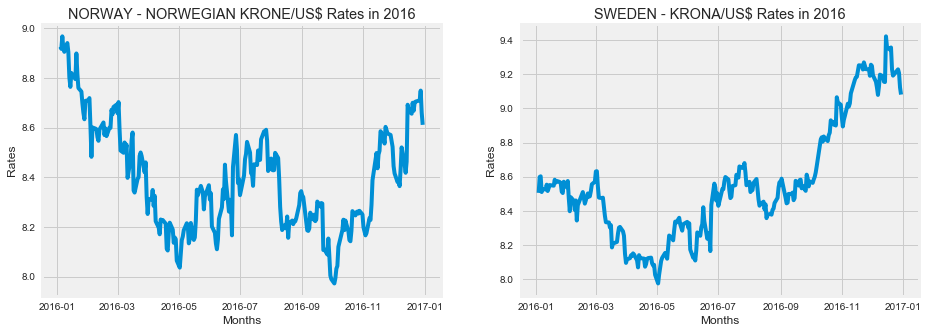

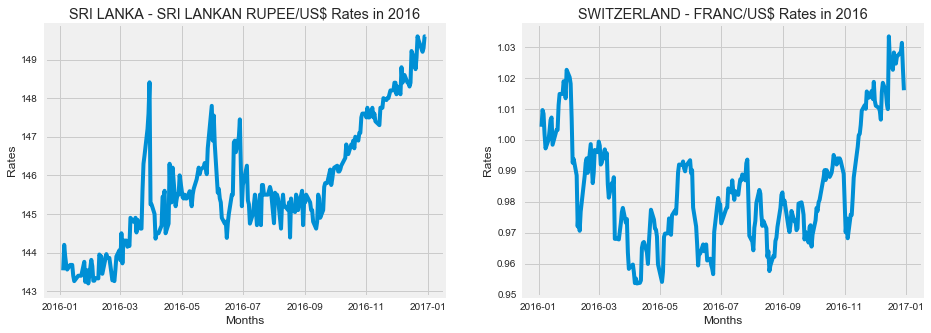

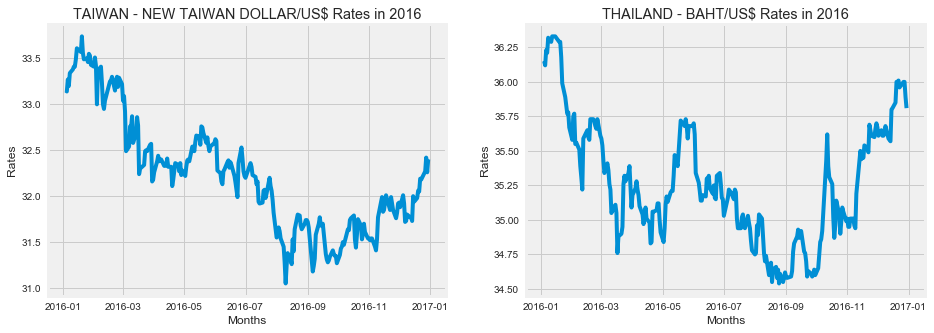

In [34]:
columns = df.columns


for i in range(0, len(columns), 2):
    
    cols = columns[i:i+2]
    data = df.loc['2016', cols]

    # setting the width and height of figure containing two subplots
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(data.iloc[:, 0])
    plt.xlabel('Months')
    plt.ylabel('Rates')
    plt.title(cols[0] + ' Rates in 2016')

    plt.subplot(1, 2, 2)
    plt.plot(data.iloc[:, 1])
    plt.title(cols[1] + ' Rates in 2016')
    plt.xlabel('Months')
    plt.ylabel('Rates')

    plt.show()

## Visualization of Timeseries Analysis of Dataset of Single Month

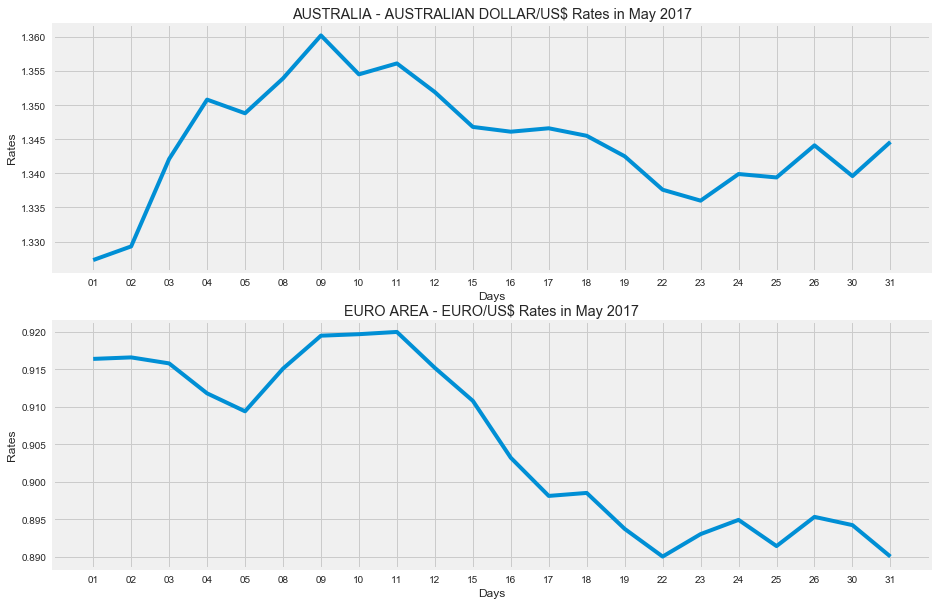

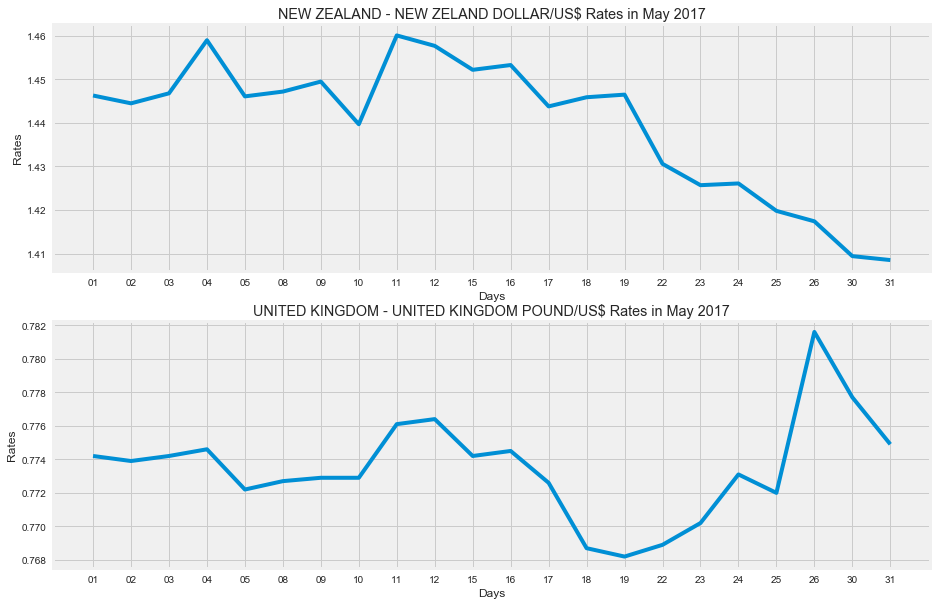

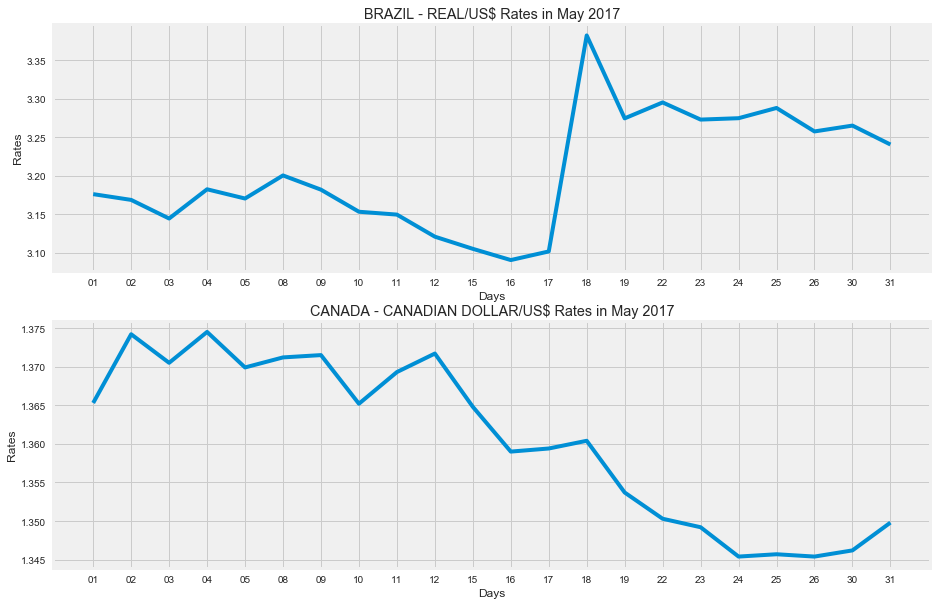

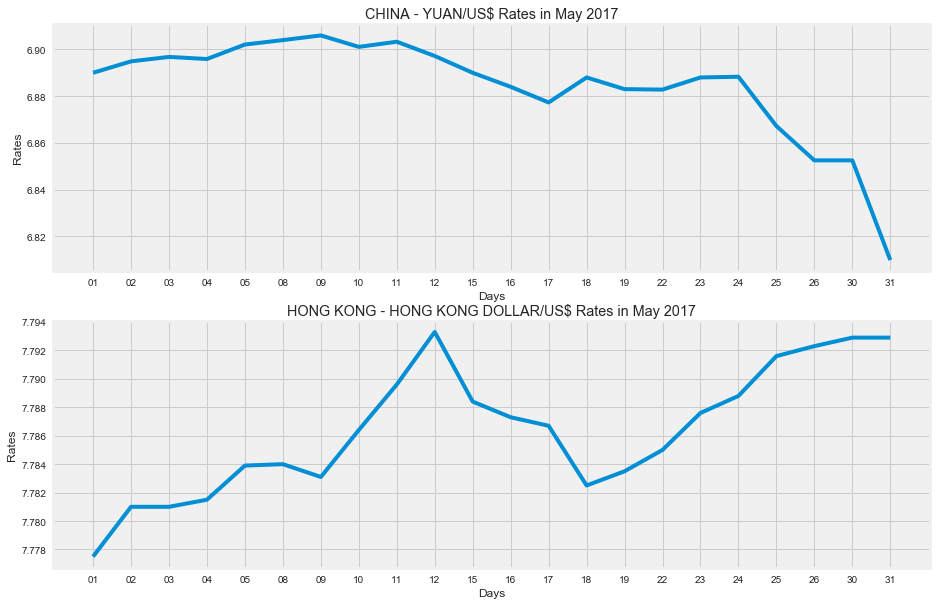

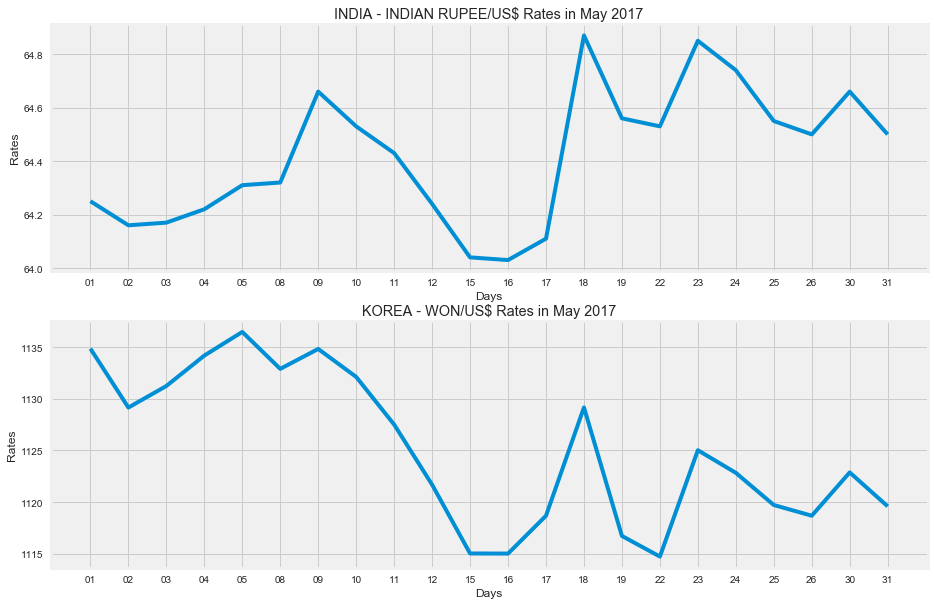

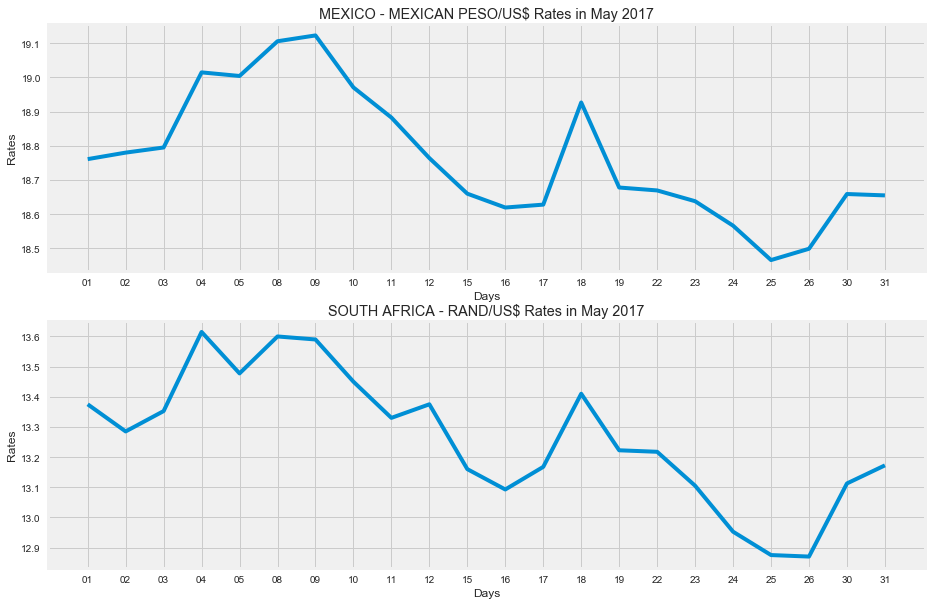

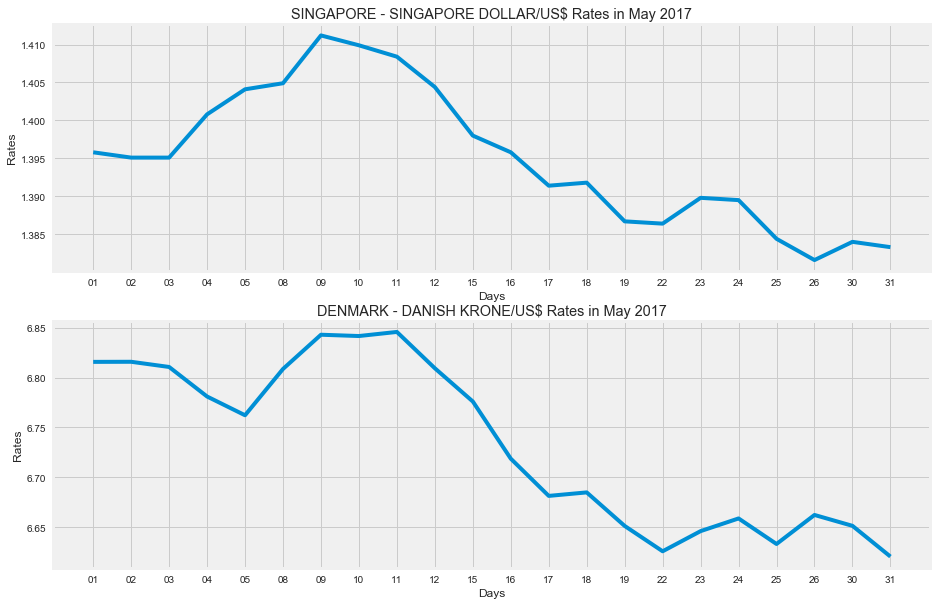

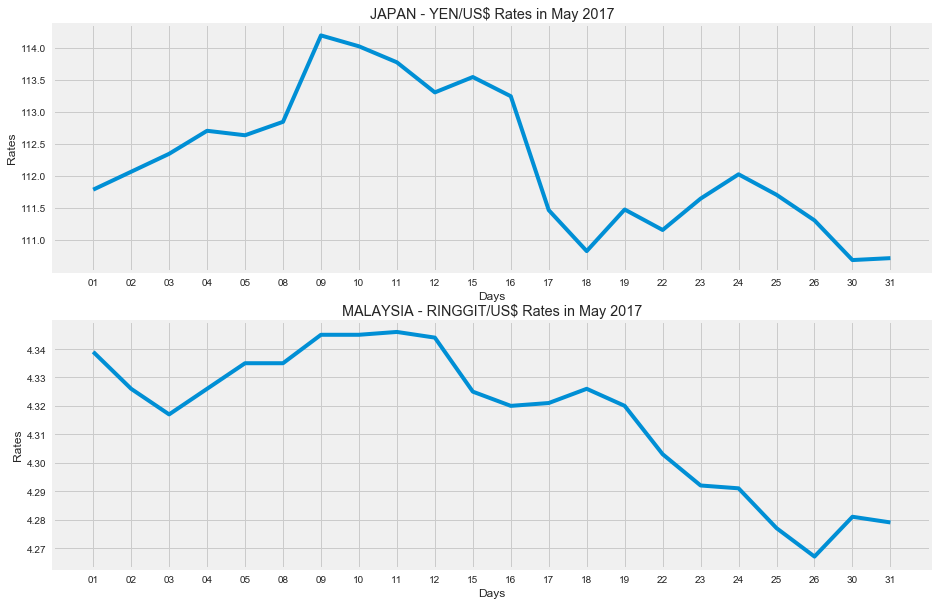

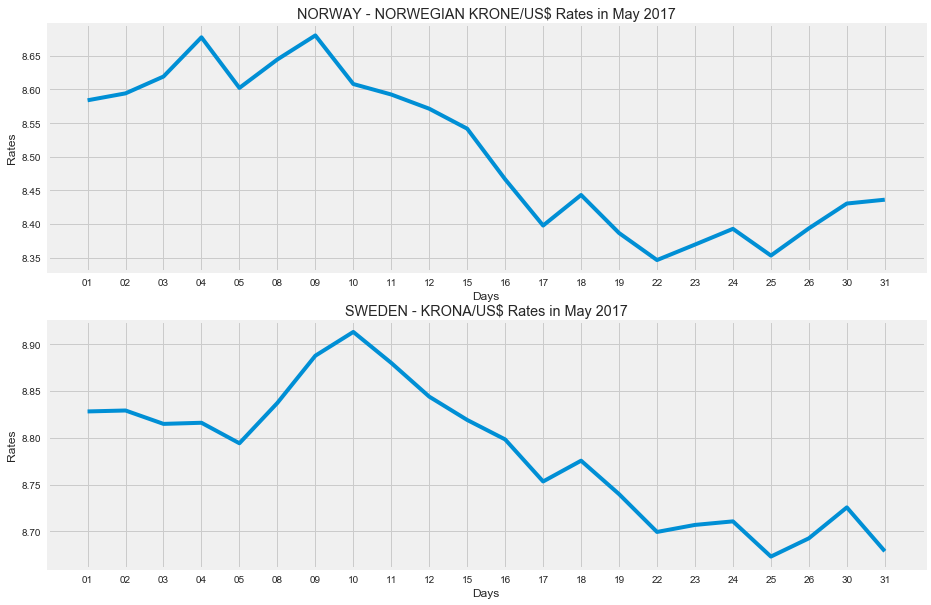

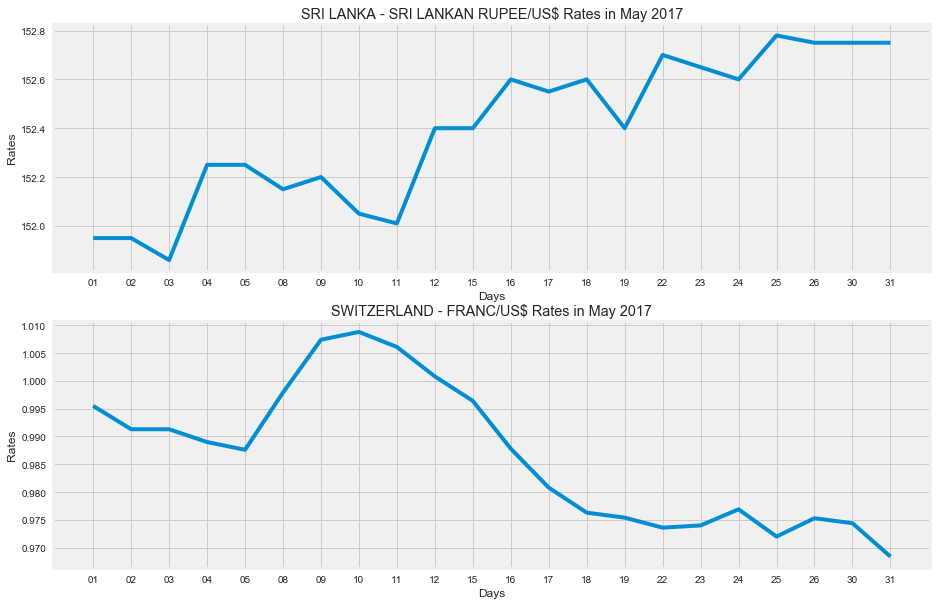

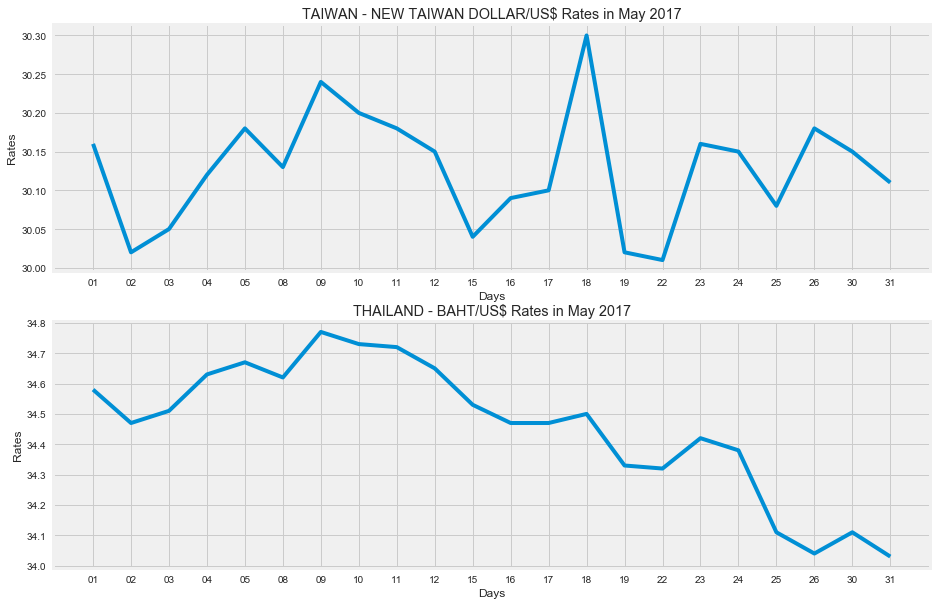

In [35]:
# plot the timeseries data with line plot

columns = df.columns


for i in range(0, len(columns), 2):

    cols = columns[i:i+2]
    
    # Selecting Month of May in 2017
    data = df.loc['2017-05', cols]
    data.index = pd.to_datetime(data.index, format = '%m/%d/%Y').strftime('%d')    
    
    plt.figure(figsize=(14, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(data.iloc[:, 0])
    plt.xlabel('Days')
    plt.ylabel('Rates')
    plt.title(cols[0] + ' Rates in May 2017')

    plt.subplot(2, 1, 2)
    plt.plot(data.iloc[:, 1])
    plt.title(cols[1] + ' Rates in May 2017')
    plt.xlabel('Days')
    plt.ylabel('Rates')

    plt.show()

# APPLYING ARIMA MODEL (MACHINE LEARNING ALGORITHM) TO DATASET

## Exchange Rates Forecasting and Predictions Using Actual Data

In [36]:

def select_currency():
    """Function that prompts user to select any curreny exchange rate column from the dataset to make predictions on it"""
    global df
    selected_currency = None
    keys = np.arange(1, len(df.columns) + 1)
    columns = df.columns.values
    options = dict(zip(keys, columns))

    print('List of Currencies:\n')
    for key, value in options.items():
        print('{}: {}'.format(key, value))

    try:
        while True:
            user_input = int(input('\nSelect Any Currency: '))

            if user_input not in options.keys():
                print('Wrong Input. Try Again')
                continue
            else:
                selected_currency = options[user_input]
                break
    except:
        print('Wrong Input. Try Again')
        
    return selected_currency

In [37]:
def Make_ARIMA_Prediction(actual, P, D, Q):
    """Function that uses ARIMA MODEL to make predictions or forecast given currency exchange rate column from dataset"""
    model = ARIMA(actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction[0]
    
    
selected_currency = select_currency()
print('\nSelected Currency: ', selected_currency, '\n')

ExchangeRates = df.loc[:, selected_currency]
ExchangeRates = ExchangeRates[~np.isnan(ExchangeRates.values)]
ExchangeRates.index = pd.DatetimeIndex(ExchangeRates.index).to_period('D')

actual_data = ExchangeRates.values
total_elements = len(actual_data)

# Using 70% from data as training and other 30% for testing the model
training_size = int(total_elements * 0.7)
training_data = actual_data[0:training_size]
test_data = actual_data[training_size:total_elements]

# New lists to save actual and predicted values
actual_values = [i for i in training_data]
predicted_values = []

# Predict values in for loop using ARIMA MODEL
for days in range(len(test_data)):
    actual_value =  test_data[days]
    #forecast value
    prediction = Make_ARIMA_Prediction(actual_values, 2,1,0)
    print('Actual={:.5f} \t Predicted={:.5f}'.format(actual_value, prediction))
    #adding values in the list
    predicted_values.append(prediction)
    actual_values.append(actual_value)

# Print MSE to check how accurate model was
mse_error = mean_squared_error(test_data, predicted_values)

'''
MSE or Mean Squared Error used in statistics to estimate average of squared errors between actual and estimated values, 
e.g. here predicted values generated by ARIMA MODEL. 

It is used in Machine Learning models like ARIMA, to check the quality of the model that how accurate that model has 
generated predictions.

If Mean Squared Error value is non-negative and closest to zero than it means the model has high correctness or it has 
better accuracy in generating predictions or future values based on any given trained data.
'''

# Below line will show Mean Squared Error value of ARIMA MODEL used on given dataset
# the more the smaller Mean Squared Error is, the more the model is accurate
print('\nMean Squared Error: {:.4f}\n'.format(mse_error))

List of Currencies:

1: AUSTRALIA - AUSTRALIAN DOLLAR/US$
2: EURO AREA - EURO/US$
3: NEW ZEALAND - NEW ZELAND DOLLAR/US$
4: UNITED KINGDOM - UNITED KINGDOM POUND/US$
5: BRAZIL - REAL/US$
6: CANADA - CANADIAN DOLLAR/US$
7: CHINA - YUAN/US$
8: HONG KONG - HONG KONG DOLLAR/US$
9: INDIA - INDIAN RUPEE/US$
10: KOREA - WON/US$
11: MEXICO - MEXICAN PESO/US$
12: SOUTH AFRICA - RAND/US$
13: SINGAPORE - SINGAPORE DOLLAR/US$
14: DENMARK - DANISH KRONE/US$
15: JAPAN - YEN/US$
16: MALAYSIA - RINGGIT/US$
17: NORWAY - NORWEGIAN KRONE/US$
18: SWEDEN - KRONA/US$
19: SRI LANKA - SRI LANKAN RUPEE/US$
20: SWITZERLAND - FRANC/US$
21: TAIWAN - NEW TAIWAN DOLLAR/US$
22: THAILAND - BAHT/US$

Select Any Currency: 19

Selected Currency:  SRI LANKA - SRI LANKAN RUPEE/US$ 

Actual=130.70000 	 Predicted=130.66547
Actual=130.75000 	 Predicted=130.72046
Actual=130.70000 	 Predicted=130.76723
Actual=130.70000 	 Predicted=130.71223
Actual=130.75000 	 Predicted=130.71795
Actual=130.75000 	 Predicted=130.76883
Actual=13

Actual=130.30000 	 Predicted=130.29179
Actual=130.30000 	 Predicted=130.31768
Actual=130.40000 	 Predicted=130.31475
Actual=130.40000 	 Predicted=130.42039
Actual=130.40000 	 Predicted=130.41219
Actual=130.30000 	 Predicted=130.41541
Actual=130.26000 	 Predicted=130.31040
Actual=130.26000 	 Predicted=130.27659
Actual=130.32000 	 Predicted=130.27664
Actual=130.32000 	 Predicted=130.33835
Actual=130.30000 	 Predicted=130.33343
Actual=130.30000 	 Predicted=130.31436
Actual=130.60000 	 Predicted=130.31599
Actual=130.60000 	 Predicted=130.63036
Actual=130.70000 	 Predicted=130.60576
Actual=130.55000 	 Predicted=130.72042
Actual=130.60000 	 Predicted=130.55473
Actual=130.70000 	 Predicted=130.62271
Actual=130.70000 	 Predicted=130.71879
Actual=130.70000 	 Predicted=130.71221
Actual=130.80000 	 Predicted=130.71542
Actual=130.80000 	 Predicted=130.82041
Actual=130.80000 	 Predicted=130.81223
Actual=130.80000 	 Predicted=130.81544
Actual=130.80000 	 Predicted=130.81543
Actual=130.75000 	 Predic

Actual=133.64000 	 Predicted=133.67848
Actual=133.62000 	 Predicted=133.65286
Actual=133.59000 	 Predicted=133.63511
Actual=133.71000 	 Predicted=133.60462
Actual=133.71000 	 Predicted=133.73215
Actual=133.75000 	 Predicted=133.72156
Actual=133.75000 	 Predicted=133.76735
Actual=133.80000 	 Predicted=133.76414
Actual=133.90000 	 Predicted=133.81784
Actual=133.83000 	 Predicted=133.91863
Actual=134.00000 	 Predicted=133.83887
Actual=133.71000 	 Predicted=134.02586
Actual=133.84000 	 Predicted=133.70612
Actual=133.90000 	 Predicted=133.87093
Actual=133.98000 	 Predicted=133.91412
Actual=134.09000 	 Predicted=133.99734
Actual=133.81000 	 Predicted=134.10815
Actual=133.81000 	 Predicted=133.80858
Actual=134.14000 	 Predicted=133.83442
Actual=133.81000 	 Predicted=134.17116
Actual=134.50000 	 Predicted=133.79915
Actual=134.50000 	 Predicted=134.55816
Actual=134.40000 	 Predicted=134.49370
Actual=134.75000 	 Predicted=134.41091
Actual=137.50000 	 Predicted=134.78504
Actual=138.24000 	 Predic

Actual=145.55000 	 Predicted=146.78134
Actual=145.65000 	 Predicted=145.55472
Actual=145.40000 	 Predicted=145.70694
Actual=145.30000 	 Predicted=145.40805
Actual=144.90000 	 Predicted=145.32200
Actual=144.75000 	 Predicted=144.90933
Actual=144.80000 	 Predicted=144.77455
Actual=144.38000 	 Predicted=144.82314
Actual=144.76000 	 Predicted=144.38441
Actual=145.00000 	 Predicted=144.79958
Actual=145.50000 	 Predicted=145.01359
Actual=145.50000 	 Predicted=145.52498
Actual=146.85000 	 Predicted=145.50392
Actual=146.90000 	 Predicted=146.90532
Actual=146.60000 	 Predicted=146.88425
Actual=147.00000 	 Predicted=146.60831
Actual=147.45000 	 Predicted=147.03703
Actual=146.20000 	 Predicted=147.46974
Actual=145.20000 	 Predicted=146.17206
Actual=145.75000 	 Predicted=145.22491
Actual=146.25000 	 Predicted=145.81409
Actual=145.35000 	 Predicted=146.26473
Actual=145.25000 	 Predicted=145.32627
Actual=144.75000 	 Predicted=145.29464
Actual=145.00000 	 Predicted=144.75672
Actual=145.25000 	 Predic

Actual=152.23000 	 Predicted=151.38915
Actual=152.13000 	 Predicted=152.26520
Actual=151.98000 	 Predicted=152.12090
Actual=151.83000 	 Predicted=152.00033
Actual=151.80000 	 Predicted=151.85185
Actual=151.80000 	 Predicted=151.82310
Actual=152.00000 	 Predicted=151.81964
Actual=151.95000 	 Predicted=152.02085
Actual=152.00000 	 Predicted=151.96191
Actual=152.00000 	 Predicted=152.02083
Actual=151.75000 	 Predicted=152.01716
Actual=151.90000 	 Predicted=151.76603
Actual=152.10000 	 Predicted=151.92812
Actual=152.10000 	 Predicted=152.11611
Actual=151.95000 	 Predicted=152.11243
Actual=151.95000 	 Predicted=151.96712
Actual=151.86000 	 Predicted=151.97343
Actual=152.25000 	 Predicted=151.87772
Actual=152.25000 	 Predicted=152.27566
Actual=152.15000 	 Predicted=152.25644
Actual=152.20000 	 Predicted=152.16769
Actual=152.05000 	 Predicted=152.22242
Actual=152.01000 	 Predicted=152.06556
Actual=152.40000 	 Predicted=152.03300
Actual=152.40000 	 Predicted=152.42408
Actual=152.60000 	 Predic

Actual=155.50000 	 Predicted=154.85333
Actual=154.85000 	 Predicted=155.51985
Actual=155.10000 	 Predicted=154.85055
Actual=155.40000 	 Predicted=155.13613
Actual=155.15000 	 Predicted=155.41214
Actual=155.15000 	 Predicted=155.16043
Actual=155.10000 	 Predicted=155.17549
Actual=154.80000 	 Predicted=155.11865
Actual=154.80000 	 Predicted=154.81982
Actual=154.95000 	 Predicted=154.82674
Actual=154.95000 	 Predicted=154.96869
Actual=155.15000 	 Predicted=154.96453
Actual=154.90000 	 Predicted=155.16875
Actual=155.00000 	 Predicted=154.91308
Actual=155.30000 	 Predicted=155.02543
Actual=155.35000 	 Predicted=155.31605
Actual=155.40000 	 Predicted=155.36052
Actual=155.60000 	 Predicted=155.41735
Actual=155.65000 	 Predicted=155.61745
Actual=155.80000 	 Predicted=155.66331
Actual=155.95000 	 Predicted=155.81747
Actual=155.95000 	 Predicted=155.96479
Actual=156.00000 	 Predicted=155.96472
Actual=156.05000 	 Predicted=156.01883
Actual=156.00000 	 Predicted=156.06747
Actual=156.10000 	 Predic

Actual=179.80000 	 Predicted=179.72288
Actual=180.10000 	 Predicted=179.82290
Actual=180.75000 	 Predicted=180.12593
Actual=181.00000 	 Predicted=180.77933
Actual=181.73000 	 Predicted=181.01970
Actual=182.10000 	 Predicted=181.76193
Actual=182.70000 	 Predicted=182.12194
Actual=182.60000 	 Predicted=182.72974
Actual=182.80000 	 Predicted=182.61603
Actual=182.65000 	 Predicted=182.82715
Actual=182.50000 	 Predicted=182.66880
Actual=182.10000 	 Predicted=182.52176
Actual=182.50000 	 Predicted=182.11748
Actual=182.30000 	 Predicted=182.53287
Actual=181.90000 	 Predicted=182.31631
Actual=181.80000 	 Predicted=181.91803
Actual=182.10000 	 Predicted=181.82459
Actual=182.20000 	 Predicted=182.12861
Actual=181.40000 	 Predicted=182.22180
Actual=181.40000 	 Predicted=181.40877
Actual=182.05000 	 Predicted=181.43018
Actual=182.00000 	 Predicted=182.08338
Actual=181.50000 	 Predicted=182.01526
Actual=181.50000 	 Predicted=181.51518
Actual=181.45000 	 Predicted=181.52824
Actual=180.60000 	 Predic

Actual=181.10000 	 Predicted=181.31589
Actual=181.20000 	 Predicted=181.11859
Actual=181.35000 	 Predicted=181.22710
Actual=181.45000 	 Predicted=181.37484
Actual=181.50000 	 Predicted=181.47270
Actual=181.05000 	 Predicted=181.52182
Actual=181.10000 	 Predicted=181.05716
Actual=180.45000 	 Predicted=181.12876
Actual=180.20000 	 Predicted=180.45103
Actual=180.50000 	 Predicted=180.22156
Actual=180.69000 	 Predicted=180.53363
Actual=180.50000 	 Predicted=180.71340
Actual=180.33000 	 Predicted=180.51312
Actual=180.20000 	 Predicted=180.34854
Actual=180.30000 	 Predicted=180.21946
Actual=180.06000 	 Predicted=180.32601
Actual=179.45000 	 Predicted=180.07263
Actual=179.25000 	 Predicted=179.45534
Actual=179.20000 	 Predicted=179.27258
Actual=179.60000 	 Predicted=179.22201
Actual=179.93000 	 Predicted=179.63420
Actual=180.85000 	 Predicted=179.95638
Actual=181.50000 	 Predicted=180.89656
Actual=180.95000 	 Predicted=181.53180
Actual=180.85000 	 Predicted=180.94532
Actual=181.25000 	 Predic

## Visualization of Actual vs Prediction values generated by ARIMA MODEL

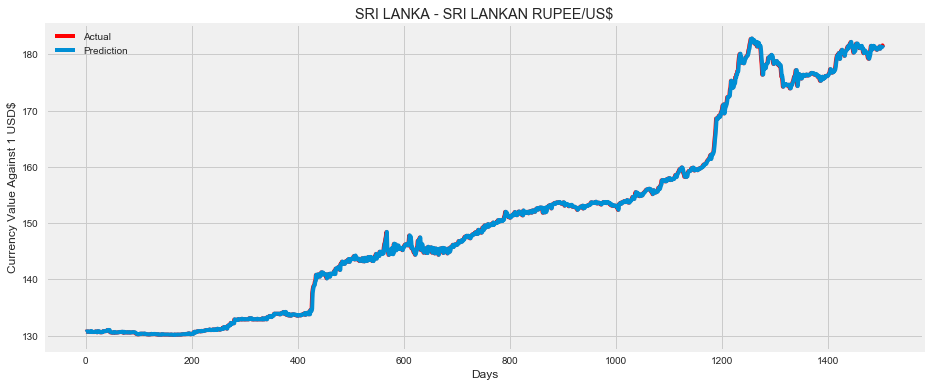

In [38]:
# plotting the graph of actual vs prediction

'''
red line (which shows actual values) will be there in graph, you will see the glimpse of it. This will reflect the 
correctness of model in case of red line not being shown clearly in graph which means it's going nearest with green line.
'''

plt.figure(figsize=(14, 6))
plt.plot(test_data, color='red', label='Actual')
plt.plot(predicted_values, label='Prediction')
plt.title(selected_currency)
plt.xlabel('Days')
plt.ylabel('Currency Value Against 1 USD$')
plt.legend(loc='upper left')

plt.show()
